<a href="https://colab.research.google.com/github/rdiazg14/STATS/blob/main/ANALISIS_FACTORIAL_TEST_EVALUACION_PERSONALIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install factor_analyzer

# Importando bibliotecas (libraries) necessárias
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

!wget -O bfi.csv http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv

# A leitura do arquivo de dados para dentro de um dataframe (do pandas)
df = pd.read_csv('bfi.csv')

# Renomear a primeira coluna (que está sem nome) para 'id'
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True) 
print('A tabela importada contém %d linhas, %d colunas' % df.shape)
print('contendo as seguintes colunas:\n', df.columns)

# Para visualizar a tabela importada:
df.head()

--2021-07-19 04:28:39--  http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv
Resolving www-eio.upc.edu (www-eio.upc.edu)... 147.83.24.219
Connecting to www-eio.upc.edu (www-eio.upc.edu)|147.83.24.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182884 (179K) [text/csv]
Saving to: ‘bfi.csv’

bfi.csv             100%[===================>] 178.60K   211KB/s    in 0.8s    

2021-07-19 04:28:40 (211 KB/s) - ‘bfi.csv’ saved [182884/182884]

A tabela importada contém 2800 linhas, 29 colunas
contendo as seguintes colunas:
 Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3',
       'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')


id   A1   A2   A3   A4   A5  ...   O3   O4   O5  gender  education  age
0  61617  2.0  4.0  3.0  4.0  4.0  ...  3.0  4.0  3.0       1        NaN   16
1  61618  2.0  4.0  5.0  2.0  5.0  ...  4.0  3.0  3.0       2        NaN   18
2  61620  5.0  4.0  5.0  4.0  4.0  ...  5.0  5.0  2.0       2        NaN   17
3  61621  4.0  4.0  6.0  5.0  5.0  ...  4.0  3.0  5.0       2        NaN   17
4  61622  2.0  3.0  3.0  4.0  5.0  ...  4.0  3.0  3.0       1        NaN   17

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2800 non-null   int64  
 1   A1         2784 non-null   float64
 2   A2         2773 non-null   float64
 3   A3         2774 non-null   float64
 4   A4         2781 non-null   float64
 5   A5         2784 non-null   float64
 6   C1         2779 non-null   float64
 7   C2         2776 non-null   float64
 8   C3         2780 non-null   float64
 9   C4         2774 non-null   float64
 10  C5         2784 non-null   float64
 11  E1         2777 non-null   float64
 12  E2         2784 non-null   float64
 13  E3         2775 non-null   float64
 14  E4         2791 non-null   float64
 15  E5         2779 non-null   float64
 16  N1         2778 non-null   float64
 17  N2         2779 non-null   float64
 18  N3         2789 non-null   float64
 19  N4         2764 non-null   float64
 20  N5      

In [ ]:
df.describe

<bound method NDFrame.describe of          id   A1   A2   A3   A4   A5  ...   O3   O4   O5  gender  education  age
0     61617  2.0  4.0  3.0  4.0  4.0  ...  3.0  4.0  3.0       1        NaN   16
1     61618  2.0  4.0  5.0  2.0  5.0  ...  4.0  3.0  3.0       2        NaN   18
2     61620  5.0  4.0  5.0  4.0  4.0  ...  5.0  5.0  2.0       2        NaN   17
3     61621  4.0  4.0  6.0  5.0  5.0  ...  4.0  3.0  5.0       2        NaN   17
4     61622  2.0  3.0  3.0  4.0  5.0  ...  4.0  3.0  3.0       1        NaN   17
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...        ...  ...
2795  67551  6.0  1.0  3.0  3.0  3.0  ...  6.0  6.0  1.0       1        3.0   19
2796  67552  2.0  4.0  4.0  3.0  5.0  ...  5.0  4.0  2.0       1        4.0   27
2797  67556  2.0  3.0  5.0  2.0  5.0  ...  6.0  4.0  3.0       2        4.0   29
2798  67559  5.0  2.0  2.0  4.0  4.0  ...  5.0  5.0  1.0       1        4.0   31
2799  67560  2.0  3.0  1.0  4.0  2.0  ...  3.0  5.0  1.0       2        4.0

In [ ]:
df.shape

(2800, 29)

In [ ]:
df

id   A1   A2   A3   A4   A5  ...   O3   O4   O5  gender  education  age
0     61617  2.0  4.0  3.0  4.0  4.0  ...  3.0  4.0  3.0       1        NaN   16
1     61618  2.0  4.0  5.0  2.0  5.0  ...  4.0  3.0  3.0       2        NaN   18
2     61620  5.0  4.0  5.0  4.0  4.0  ...  5.0  5.0  2.0       2        NaN   17
3     61621  4.0  4.0  6.0  5.0  5.0  ...  4.0  3.0  5.0       2        NaN   17
4     61622  2.0  3.0  3.0  4.0  5.0  ...  4.0  3.0  3.0       1        NaN   17
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...        ...  ...
2795  67551  6.0  1.0  3.0  3.0  3.0  ...  6.0  6.0  1.0       1        3.0   19
2796  67552  2.0  4.0  4.0  3.0  5.0  ...  5.0  4.0  2.0       1        4.0   27
2797  67556  2.0  3.0  5.0  2.0  5.0  ...  6.0  4.0  3.0       2        4.0   29
2798  67559  5.0  2.0  2.0  4.0  4.0  ...  5.0  5.0  1.0       1        4.0   31
2799  67560  2.0  3.0  1.0  4.0  2.0  ...  3.0  5.0  1.0       2        4.0   50

[2800 rows x 29 columns]

In [ ]:
# Tabela dfDemografico armazena id, sexo, educação e idade
dfDemografico = df[['id', 'gender', 'education', 'age']]

# Colunas desnecessárias são eliminadas de df
df.drop(['id', 'gender', 'education', 'age'],axis=1,inplace=True)

# Possíveis dados ausentes são eliminados
df.dropna(inplace=True)

# Para verificar as colunas de df
df.head(2)

A1   A2   A3   A4   A5   C1   C2  ...   N4   N5   O1  O2   O3   O4   O5
0  2.0  4.0  3.0  4.0  4.0  2.0  3.0  ...  2.0  3.0  3.0   6  3.0  4.0  3.0
1  2.0  4.0  5.0  2.0  5.0  5.0  4.0  ...  5.0  5.0  4.0   2  4.0  3.0  3.0

[2 rows x 25 columns]

In [ ]:
df

A1   A2   A3   A4   A5   C1   C2  ...   N4   N5   O1  O2   O3   O4   O5
0     2.0  4.0  3.0  4.0  4.0  2.0  3.0  ...  2.0  3.0  3.0   6  3.0  4.0  3.0
1     2.0  4.0  5.0  2.0  5.0  5.0  4.0  ...  5.0  5.0  4.0   2  4.0  3.0  3.0
2     5.0  4.0  5.0  4.0  4.0  4.0  5.0  ...  2.0  3.0  4.0   2  5.0  5.0  2.0
3     4.0  4.0  6.0  5.0  5.0  4.0  4.0  ...  4.0  1.0  3.0   3  4.0  3.0  5.0
4     2.0  3.0  3.0  4.0  5.0  4.0  4.0  ...  4.0  3.0  3.0   3  4.0  3.0  3.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...
2793  3.0  4.0  3.0  1.0  3.0  5.0  4.0  ...  5.0  6.0  6.0   1  4.0  5.0  2.0
2794  5.0  5.0  5.0  5.0  3.0  5.0  4.0  ...  5.0  2.0  6.0   1  5.0  6.0  2.0
2797  2.0  3.0  5.0  2.0  5.0  5.0  5.0  ...  3.0  1.0  5.0   1  6.0  4.0  3.0
2798  5.0  2.0  2.0  4.0  4.0  5.0  5.0  ...  4.0  1.0  5.0   2  5.0  5.0  1.0
2799  2.0  3.0  1.0  4.0  2.0  5.0  5.0  ...  1.0  1.0  3.0   1  3.0  5.0  1.0

[2436 rows x 25 columns]

In [ ]:
# Uma visão geral dos dados no dataframe df pode ser vista:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [ ]:
# Converter o campo O2 em float
df['O2'] = df['O2'].astype(np.float64)

type(df['O2'][0])    # Agora o campo é do tipo numpy.float64

numpy.float64

In [ ]:
itens=df.columns
print(itens)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')


In [ ]:
# A matriz de correlação entre todas as respostas na tabela
corrMatriz = df.corr()

# Para ver apenas as correlações entre variáveis do grupo A
corrMatriz[["A1", "A2","A3", "A4","A5"]].head(5)

A1        A2        A3        A4        A5
A1  1.000000 -0.350905 -0.273636 -0.156754 -0.192698
A2 -0.350905  1.000000  0.503041  0.350856  0.397400
A3 -0.273636  0.503041  1.000000  0.384918  0.515679
A4 -0.156754  0.350856  0.384918  1.000000  0.325644
A5 -0.192698  0.397400  0.515679  0.325644  1.000000

In [ ]:
corrMatriz1 = df.corr()
corrMatriz1 

A1        A2        A3  ...        O3        O4        O5
A1  1.000000 -0.350905 -0.273636  ... -0.063788 -0.090512  0.099166
A2 -0.350905  1.000000  0.503041  ...  0.165319  0.082609 -0.080838
A3 -0.273636  0.503041  1.000000  ...  0.226333  0.032267 -0.041750
A4 -0.156754  0.350856  0.384918  ...  0.070983 -0.049793  0.027308
A5 -0.192698  0.397400  0.515679  ...  0.238191  0.011354 -0.050449
C1  0.014698  0.102983  0.114211  ...  0.196562  0.100189 -0.130471
C2  0.012918  0.129574  0.146511  ...  0.192681  0.047427 -0.066590
C3 -0.020587  0.188818  0.129391  ...  0.058880  0.011360 -0.002809
C4  0.115074 -0.146295 -0.121116  ... -0.083027  0.053014  0.189543
C5  0.038293 -0.121106 -0.153811  ... -0.074129  0.135482  0.055804
E1  0.107178 -0.222280 -0.210366  ... -0.217140  0.094333  0.088860
E2  0.087922 -0.243084 -0.291863  ... -0.237783  0.171923  0.081439
E3 -0.048913  0.255066  0.383131  ...  0.406377  0.052749 -0.123032
E4 -0.069781  0.297125  0.387630  ...  0.215286 -0.099381  0.047375
E5 -0.020182  0.294191  0.253463  ...  0.305585 -0.000993 -0.113211
N1  0.168279 -0.093627 -0.083266  ... -0.039215  0.078796  0.106132
N2  0.139814 -0.050476 -0.092473  ... -0.029635  0.130927  0.024446
N3  0.092366 -0.040407 -0.039158  ... -0.028228  0.165739  0.056517
N4  0.042140 -0.086735 -0.127107  ... -0.062915  0.220128  0.035744
N5  0.015181  0.019688 -0.040143  ... -0.080494  0.111470  0.138288
O1  0.005782  0.125633  0.150086  ...  0.392942  0.176874 -0.246470
O2  0.066176  0.013958  0.006588  ... -0.283608 -0.074781  0.327783
O3 -0.063788  0.165319  0.226333  ...  1.000000  0.183890 -0.310072
O4 -0.090512  0.082609  0.032267  ...  0.183890  1.000000 -0.182152
O5  0.099166 -0.080838 -0.041750  ... -0.310072 -0.182152  1.000000

[25 rows x 25 columns]

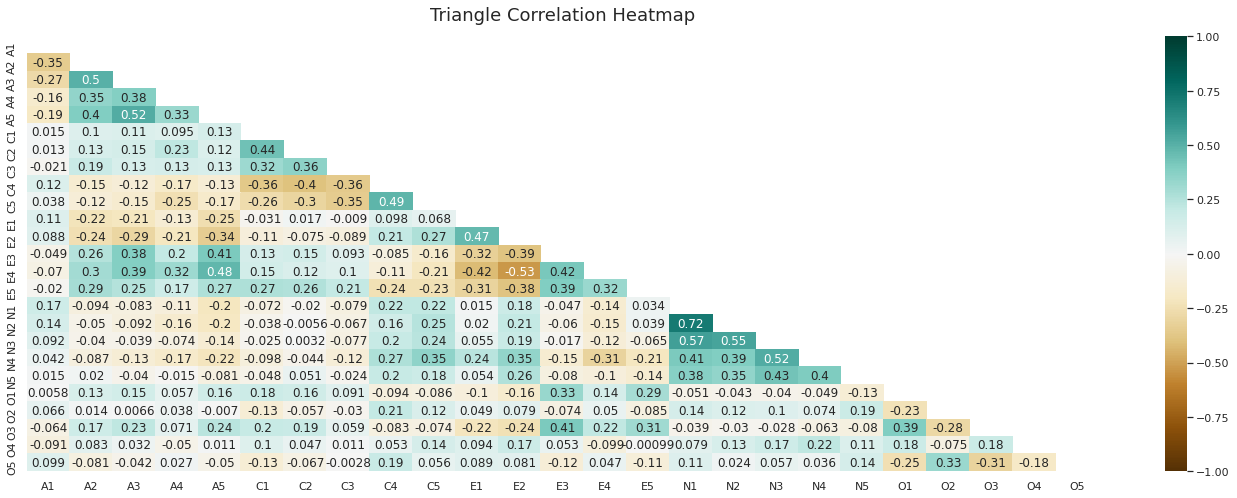

In [ ]:
import seaborn as sns
#GM.GIT.1.11 Verificamos que variables tienen una considerable correlación con el Target. En la gráfica se observa que las principales variables son target_productivity, incentive
plt.figure(figsize=(24, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

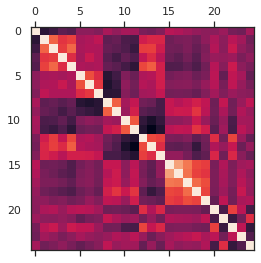

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()

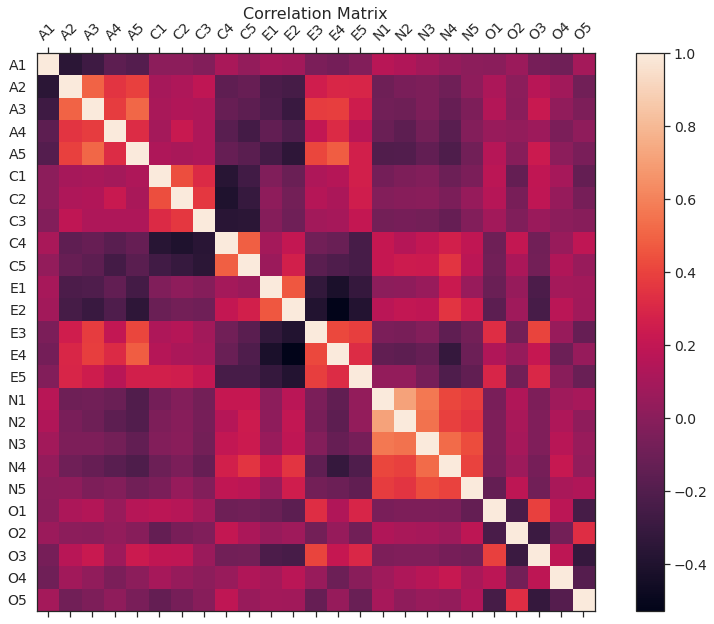

In [ ]:
f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
import pandas as pd
import numpy as np

corr1 = df.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

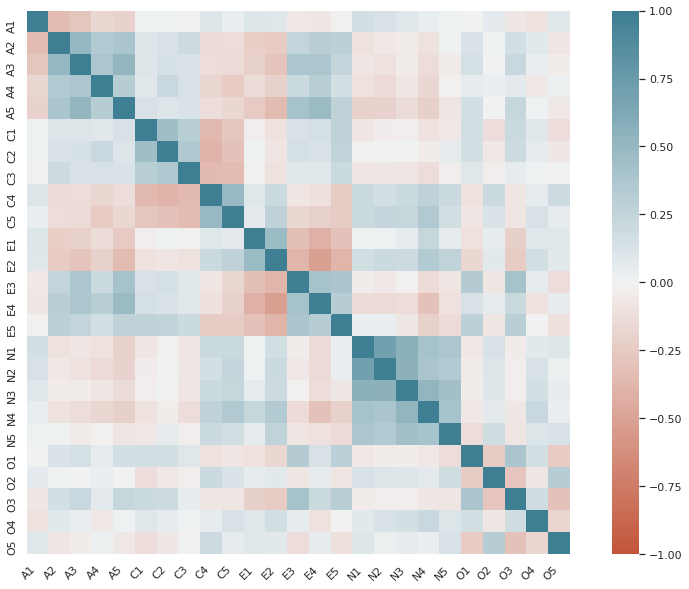

In [ ]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
plt.figure(figsize=(15, 10))
corr4 = df.corr()
ax = sns.heatmap(
    corr4, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

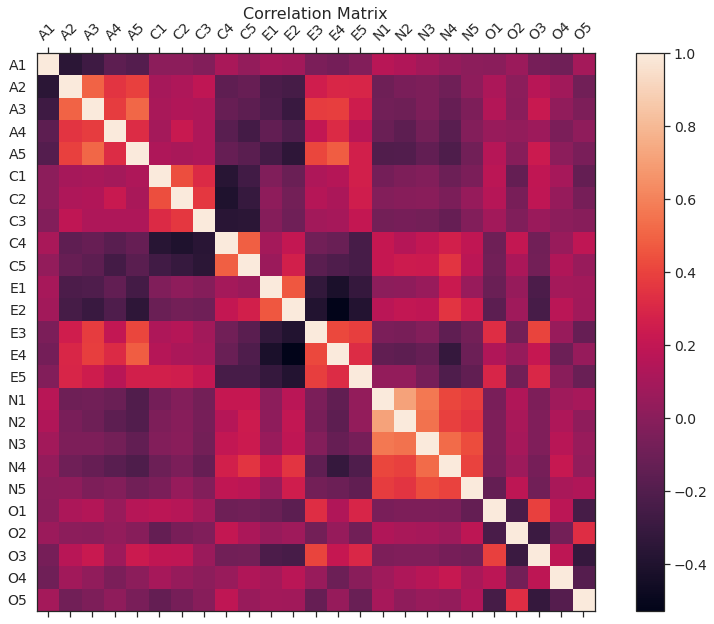

In [ ]:
f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

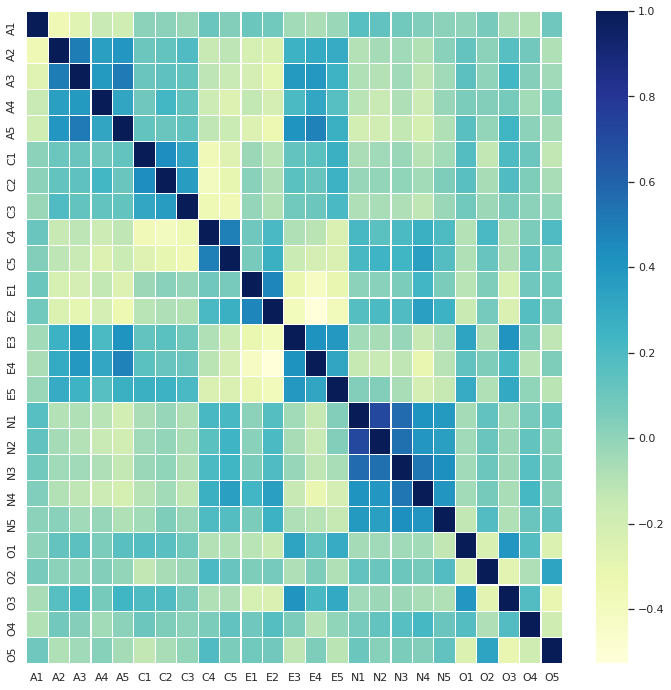

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.set(font_scale=1)
sns.heatmap(corrMatriz, linewidths=.1, linecolor='#ffffff',
            cmap='YlGnBu', xticklabels=1, yticklabels=1)

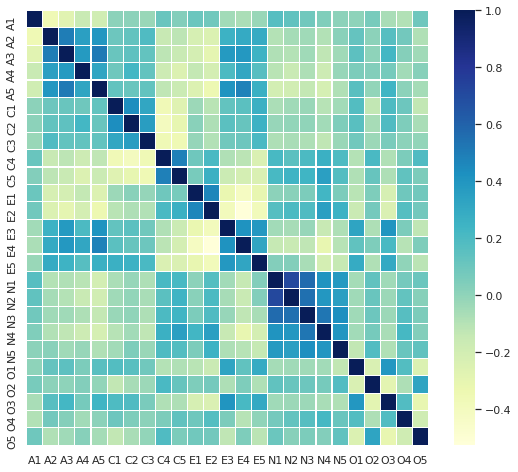

In [ ]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

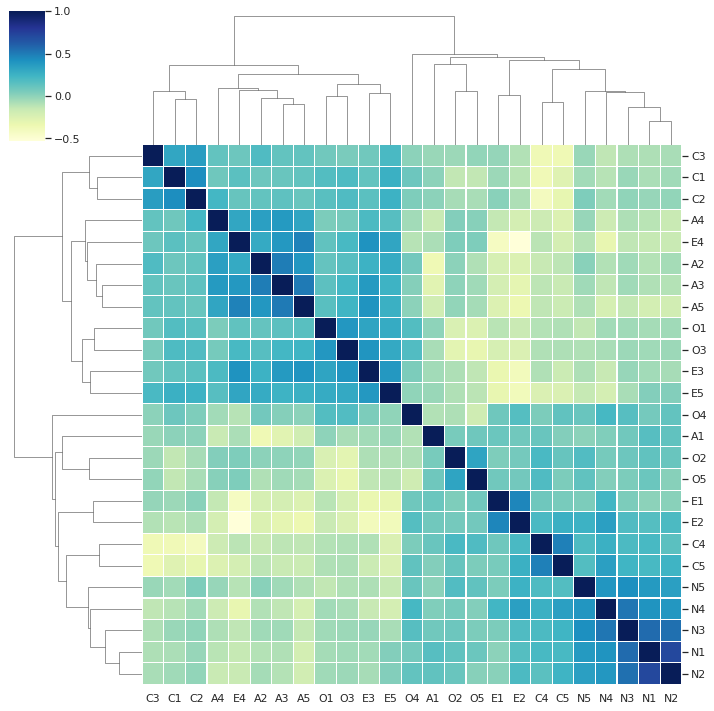

In [ ]:
corrmat = df.corr()

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg


In [ ]:
# https://www.geeksforgeeks.org/exploring-correlation-in-python/

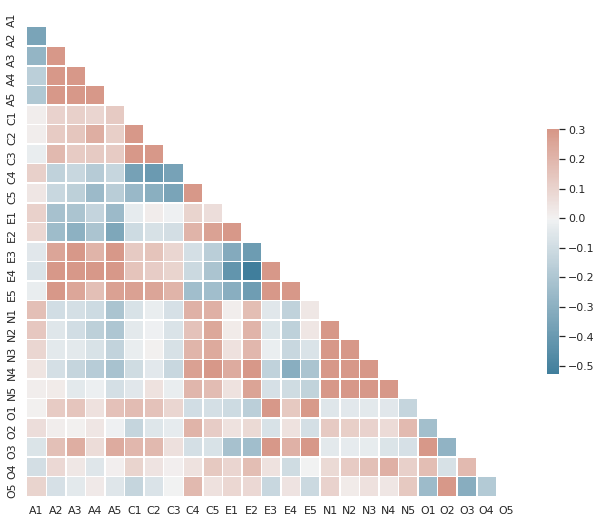

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr6 = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr6, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr6, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Importa o módulo que realiza o teste de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print('Teste da Esfericidade de Bartlett: chi² = %d,  p_value = %d' % (chi_square_value, p_value))

Teste da Esfericidade de Bartlett: chi² = 18170,  p_value = 0


In [ ]:
# Importa calculate_kmo
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model = calculate_kmo(df)

print('Valores de kmo_all =\n', kmo_all, '\n')
print('KMO =', kmo_model)

Valores de kmo_all =
 [0.75391928 0.8363196  0.87010963 0.87795367 0.90348747 0.84325413
 0.79568263 0.85186857 0.82647206 0.86401687 0.83801873 0.88380544
 0.89697008 0.87731273 0.89332158 0.77933902 0.78025018 0.86229919
 0.88518467 0.86014155 0.85858672 0.78019798 0.84434957 0.77003158
 0.76144469] 

KMO = 0.8485397221949221


In [ ]:
# Criamos objeto factor_analysis, sem rotação e usando 5 fatores (tentativamente)
fa = FactorAnalyzer(5, rotation=None)

# Aplicamos o método fit (ajuste) desse objeto no dataframe
fa.fit(df)

# Depois desse ajuste podemos coletar os autovetores e autovalores
ev, v = fa.get_eigenvalues()
print('São ' + str(len(ev)) + ' autovalores:\n', ev)

São 25 autovalores:
 [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.79920618 0.71898919 0.68808879 0.67637336 0.65179984
 0.62325295 0.59656284 0.56309083 0.54330533 0.51451752 0.49450315
 0.48263952 0.448921   0.42336611 0.40067145 0.38780448 0.38185679
 0.26253902]


In [ ]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

eixoX = range(1, len(ev)+1)   # de 1 0 26
eixoY = ev
p = figure(title="Scree Plot", x_axis_label='n-ésimo autovalor',y_axis_label='autovalor',
           x_range=[0,25], y_range=(0, 6), plot_width=600, plot_height=400,
           background_fill_color="#c9b2dd")

p.line(eixoX, eixoY, line_width=1, color = 'black')
p.circle(eixoX, eixoY, size=8, fill_color='red', color="black")

show(p)

In [ ]:
# 6 fatores
fa = FactorAnalyzer( 6, rotation="varimax")

# o objeto tem o método fit para análise do dataframe
fa.fit(df)

# Desse extraimos as cargas fatoriais (factor loadings)
# Observe que fa.loadings_ é um numpy.array com shape (25,6). Usamos o método
# do pandas pd.DataFrame.from_records para convertê-lo em um dataframe
factorLoadings = pd.DataFrame.from_records(fa.loadings_)

# Para ver a dataframe gerado:
factorLoadings.head(4)

0         1         2         3         4         5
0  0.095220  0.040783  0.048734 -0.530987 -0.113057  0.161216
1  0.033131  0.235538  0.133714  0.661141  0.063734 -0.006244
2 -0.009621  0.343008  0.121353  0.605933  0.033990  0.160106
3 -0.081518  0.219717  0.235140  0.404594 -0.125338  0.086356

In [ ]:
# Substitue as linhas pelo nomes dos itens
factorLoadings.index=itens

# Renomeia as colunas
factorLoadings.rename(columns = {0:'Fator 1',
                                 1:'Fator 2',
                                 2:'Fator 3',
                                 3:'Fator 4',
                                 4:'Fator 5',
                                 5:'Fator 6'}, inplace = True)

# Exibe o resultado
factorLoadings

Fator 1   Fator 2   Fator 3   Fator 4   Fator 5   Fator 6
A1  0.095220  0.040783  0.048734 -0.530987 -0.113057  0.161216
A2  0.033131  0.235538  0.133714  0.661141  0.063734 -0.006244
A3 -0.009621  0.343008  0.121353  0.605933  0.033990  0.160106
A4 -0.081518  0.219717  0.235140  0.404594 -0.125338  0.086356
A5 -0.149616  0.414458  0.106382  0.469698  0.030977  0.236519
C1 -0.004358  0.077248  0.554582  0.007511  0.190124  0.095035
C2  0.068330  0.038370  0.674545  0.057055  0.087593  0.152775
C3 -0.039994  0.031867  0.551164  0.101282 -0.011338  0.008996
C4  0.216283 -0.066241 -0.638475 -0.102617 -0.143846  0.318359
C5  0.284187 -0.180812 -0.544838 -0.059955  0.025837  0.132423
E1  0.022280 -0.590451  0.053915 -0.130851 -0.071205  0.156583
E2  0.233624 -0.684578 -0.088497 -0.116716 -0.045561  0.115065
E3 -0.000895  0.556774  0.103390  0.179396  0.241180  0.267291
E4 -0.136788  0.658395  0.113798  0.241143 -0.107808  0.158513
E5  0.034490  0.507535  0.309813  0.078804  0.200821  0.008747
N1  0.805806  0.068011 -0.051264 -0.174849 -0.074977 -0.096266
N2  0.789832  0.022958 -0.037477 -0.141134  0.006726 -0.139823
N3  0.725081 -0.065687 -0.059039 -0.019184 -0.010664  0.062495
N4  0.578319 -0.345072 -0.162174  0.000403  0.062916  0.147551
N5  0.523097 -0.161675 -0.025305  0.090125 -0.161892  0.120049
O1 -0.020004  0.225339  0.133201  0.005178  0.479477  0.218690
O2  0.156230 -0.001982 -0.086047  0.043989 -0.496640  0.134693
O3  0.011851  0.325954  0.093880  0.076642  0.566128  0.210777
O4  0.207281 -0.177746 -0.005671  0.133656  0.349227  0.178068
O5  0.063234 -0.014221 -0.047059 -0.057561 -0.576743  0.135936

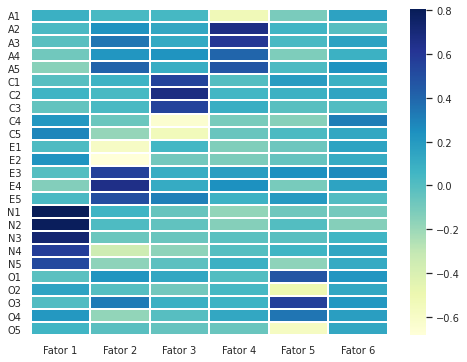

In [ ]:
# A bibioteca seaborn já foi importada como sns
plt.figure(figsize=(8,6))
sns.set(font_scale=.9)
sns.heatmap(factorLoadings,  linewidths=1, linecolor='#ffffff', cmap="YlGnBu", xticklabels=1, yticklabels=1)

In [ ]:
factorLoadings.head()

Fator 1   Fator 2   Fator 3   Fator 4   Fator 5   Fator 6
A1  0.095220  0.040783  0.048734 -0.530987 -0.113057  0.161216
A2  0.033131  0.235538  0.133714  0.661141  0.063734 -0.006244
A3 -0.009621  0.343008  0.121353  0.605933  0.033990  0.160106
A4 -0.081518  0.219717  0.235140  0.404594 -0.125338  0.086356
A5 -0.149616  0.414458  0.106382  0.469698  0.030977  0.236519

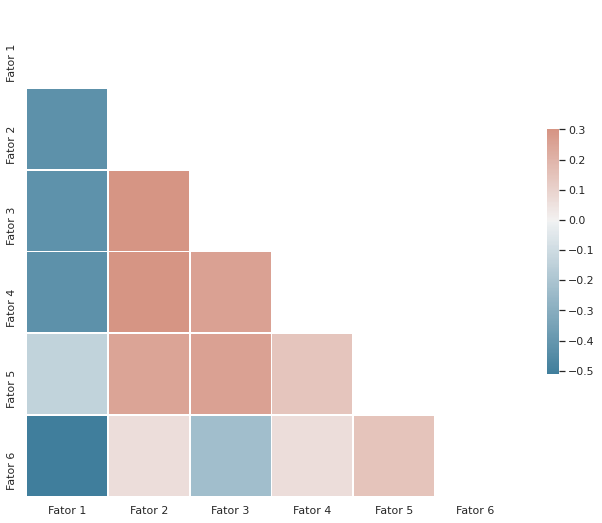

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr6 = factorLoadings.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr6, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr6, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

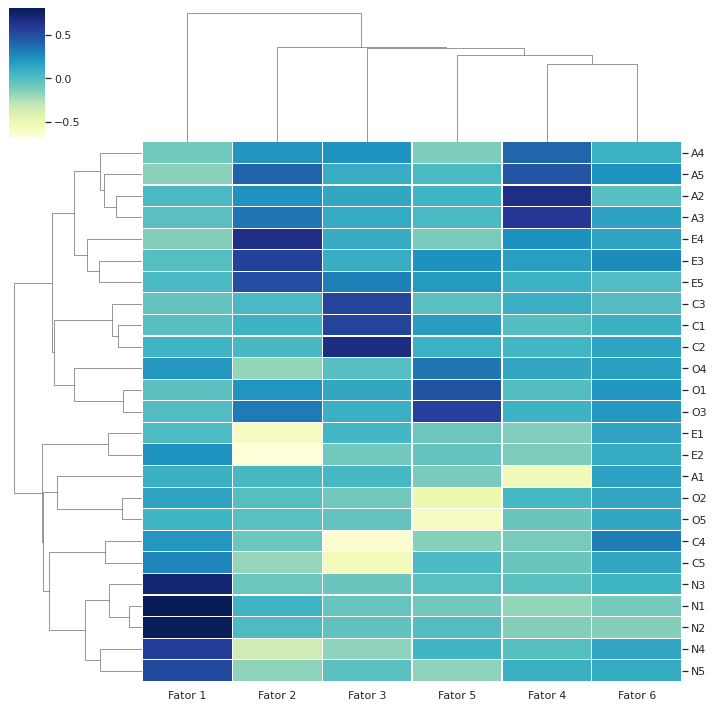

In [ ]:
corrmat = factorLoadings

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg


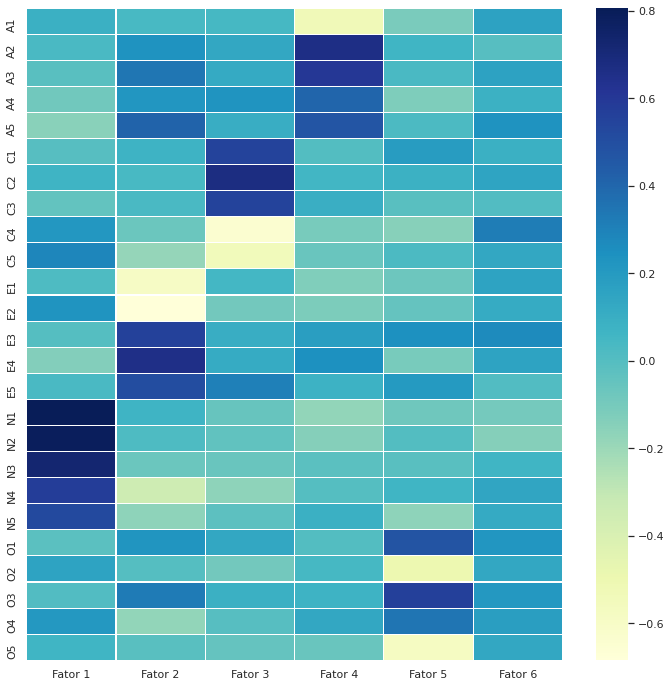

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.set(font_scale=1)
sns.heatmap(factorLoadings, linewidths=.1, linecolor='#ffffff',
            cmap='YlGnBu', xticklabels=1, yticklabels=1)

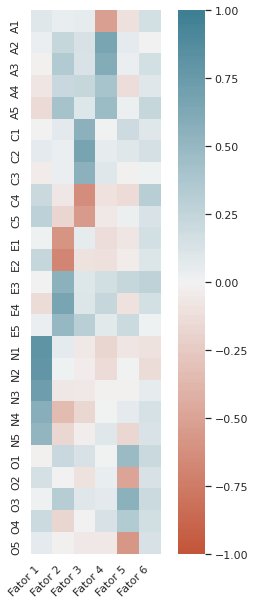

In [ ]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
plt.figure(figsize=(6, 10))
corr4 = factorLoadings
ax = sns.heatmap(
    corr4, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
import pandas as pd
import numpy as np

corr1 = factorLoadings
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

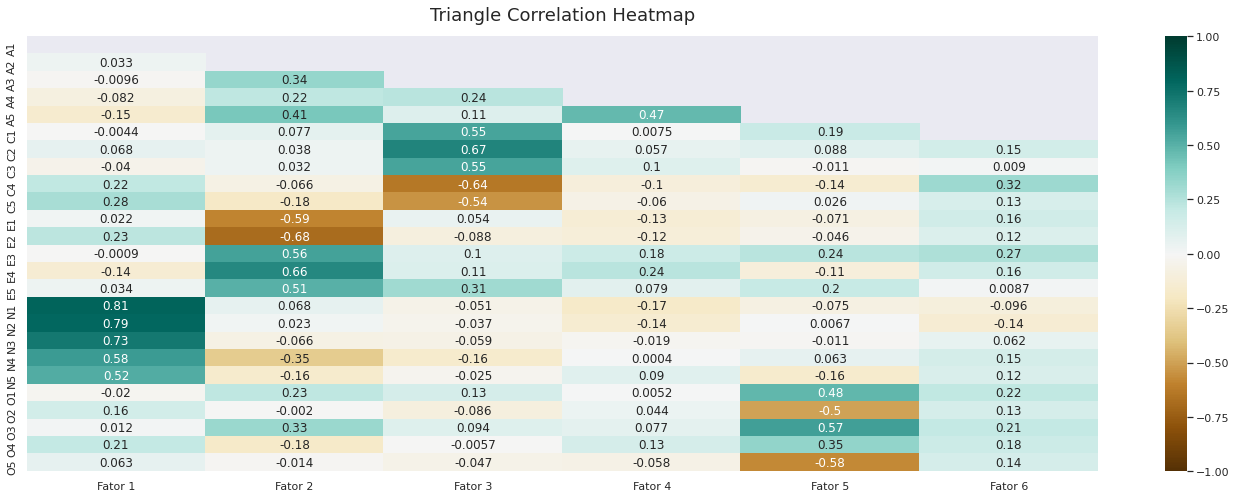

In [ ]:
import seaborn as sns
#GM.GIT.1.11 Verificamos que variables tienen una considerable correlación con el Target. En la gráfica se observa que las principales variables son target_productivity, incentive
plt.figure(figsize=(24, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(factorLoadings, dtype=np.bool))
heatmap = sns.heatmap(factorLoadings, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Refazendo o cáculo com 5 fatores apenas
# Apaga a variável fa
del fa

fa = FactorAnalyzer( 5, rotation="varimax")
fa.fit(df)
factorLoadings = pd.DataFrame.from_records(fa.loadings_)

# Renomeia itens
factorLoadings.index=itens

# Renomeia as colunas (fatores)
factorLoadings.rename(columns = {0:'Fator 1',
                                 1:'Fator 2',
                                 2:'Fator 3',
                                 3:'Fator 4',
                                 4:'Fator 5'}, inplace = True)

# Exibe o resultado
factorLoadings

Fator 1   Fator 2   Fator 3   Fator 4   Fator 5
A1  0.111126  0.040465  0.022798 -0.428166 -0.077931
A2  0.029588  0.213716  0.139037  0.626946  0.062139
A3  0.009357  0.317848  0.109331  0.650743  0.056196
A4 -0.066476  0.204566  0.230584  0.435624 -0.112700
A5 -0.122113  0.393034  0.087869  0.537087  0.066708
C1  0.010416  0.070184  0.545824  0.038878  0.209584
C2  0.089574  0.033270  0.648731  0.102782  0.115434
C3 -0.030855  0.023907  0.557036  0.111578 -0.005183
C4  0.240410 -0.064984 -0.633806 -0.037498 -0.107535
C5  0.290318 -0.176395 -0.562467 -0.047525  0.036822
E1  0.042819 -0.574835  0.033144 -0.104813 -0.058795
E2  0.244743 -0.678731 -0.102483 -0.112517 -0.042010
E3  0.024180  0.536816  0.083010  0.257906  0.280877
E4 -0.115614  0.646833  0.102023  0.306101 -0.073422
E5  0.036145  0.504069  0.312899  0.090354  0.213739
N1  0.786807  0.078923 -0.045997 -0.216363 -0.084704
N2  0.754109  0.027301 -0.030568 -0.193744 -0.010304
N3  0.731721 -0.061430 -0.067084 -0.027712 -0.004217
N4  0.590602 -0.345388 -0.178902  0.005886  0.075225
N5  0.537858 -0.161291 -0.037309  0.100931 -0.149769
O1 -0.002224  0.213005  0.115080  0.061550  0.504907
O2  0.175788  0.004560 -0.099729  0.081809 -0.468925
O3  0.026736  0.310956  0.076873  0.126889  0.596007
O4  0.220582 -0.191196 -0.021906  0.155475  0.369012
O5  0.085401 -0.005347 -0.062730 -0.010384 -0.533778

In [ ]:
factorLoadings =factorLoadings.abs()

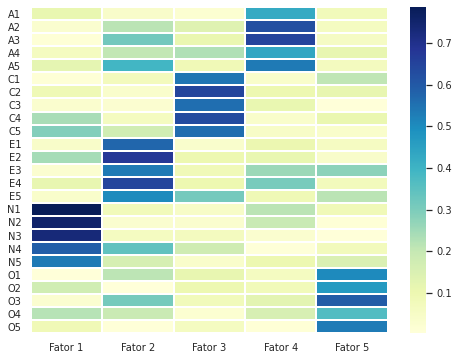

In [ ]:
plt.figure(figsize=(8,6))
sns.set(font_scale=.9)
sns.heatmap(factorLoadings,  linewidths=1, linecolor='#ffffff', cmap="YlGnBu", xticklabels=1, yticklabels=1)

In [ ]:
import pandas as pd
import numpy as np

corr1 = factorLoadings
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

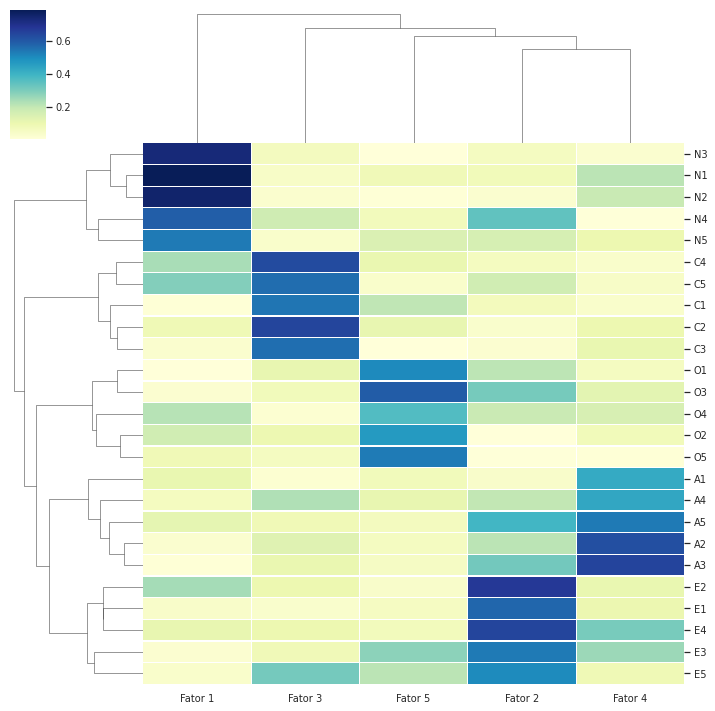

In [ ]:
corrmat = factorLoadings

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

cg


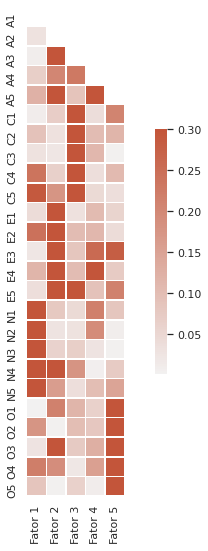

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr6 = factorLoadings

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr6, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr6, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Renomeia as colunas (fatores)
factorLoadings.rename(columns = {'Fator 1':'Neuroticismo',
                                 'Fator 2':'Extroversão',
                                 'Fator 3':'Conscienciosidade',
                                 'Fator 4':'Amabilidade',
                                 'Fator 5':'Abertura'}, inplace = True)

# Exibe o resultado (só duas linhas)
factorLoadings.head(2)	

Neuroticismo  Extroversão  Conscienciosidade  Amabilidade  Abertura
A1      0.111126     0.040465           0.022798     0.428166  0.077931
A2      0.029588     0.213716           0.139037     0.626946  0.062139

In [ ]:
(0.111126)**2 + (0.040465)**2 + (0.022798)**2 + (-0.428166)**2 +(-0.077931)**2

0.203905517222

In [ ]:
comunalidades = fa.get_communalities()

In [ ]:
fa.get_communalities()

array([0.20390517, 0.46280338, 0.53969218, 0.30190473, 0.47002029,
       0.34839471, 0.45387181, 0.32428892, 0.47669925, 0.43538283,
       0.34780932, 0.54550199, 0.44105495, 0.54125654, 0.40714621,
       0.68139838, 0.60800298, 0.54447487, 0.50580329, 0.34931563,
       0.31733902, 0.2674515 , 0.47464268, 0.2460347 , 0.29628368])

In [ ]:
fa.get_communalities().sum()

10.590479025334046

In [ ]:
dfComunalidades = pd.DataFrame(factorLoadings)
dfComunalidades.index = itens

In [ ]:
dfComunalidades

Neuroticismo  Extroversão  Conscienciosidade  Amabilidade  Abertura
A1      0.111126     0.040465           0.022798     0.428166  0.077931
A2      0.029588     0.213716           0.139037     0.626946  0.062139
A3      0.009357     0.317848           0.109331     0.650743  0.056196
A4      0.066476     0.204566           0.230584     0.435624  0.112700
A5      0.122113     0.393034           0.087869     0.537087  0.066708
C1      0.010416     0.070184           0.545824     0.038878  0.209584
C2      0.089574     0.033270           0.648731     0.102782  0.115434
C3      0.030855     0.023907           0.557036     0.111578  0.005183
C4      0.240410     0.064984           0.633806     0.037498  0.107535
C5      0.290318     0.176395           0.562467     0.047525  0.036822
E1      0.042819     0.574835           0.033144     0.104813  0.058795
E2      0.244743     0.678731           0.102483     0.112517  0.042010
E3      0.024180     0.536816           0.083010     0.257906  0.280877
E4      0.115614     0.646833           0.102023     0.306101  0.073422
E5      0.036145     0.504069           0.312899     0.090354  0.213739
N1      0.786807     0.078923           0.045997     0.216363  0.084704
N2      0.754109     0.027301           0.030568     0.193744  0.010304
N3      0.731721     0.061430           0.067084     0.027712  0.004217
N4      0.590602     0.345388           0.178902     0.005886  0.075225
N5      0.537858     0.161291           0.037309     0.100931  0.149769
O1      0.002224     0.213005           0.115080     0.061550  0.504907
O2      0.175788     0.004560           0.099729     0.081809  0.468925
O3      0.026736     0.310956           0.076873     0.126889  0.596007
O4      0.220582     0.191196           0.021906     0.155475  0.369012
O5      0.085401     0.005347           0.062730     0.010384  0.533778

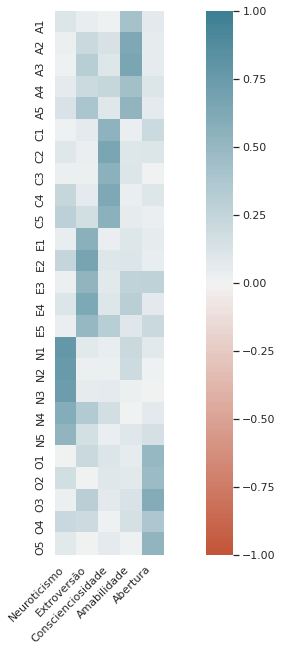

In [ ]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
plt.figure(figsize=(15, 10))
corr4 = dfComunalidades
ax = sns.heatmap(
    corr4, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
import pandas as pd
import numpy as np

corr1 = dfComunalidades
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
# PuBuGn

In [ ]:



!wget -O bfi.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv
_data = pd.read_csv('bfi.csv')
_data.head(5)

--2021-07-19 04:28:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7665 (7.5K) [application/x-httpd-php]
Saving to: ‘bfi.csv’

bfi.csv             100%[===================>]   7.49K  --.-KB/s    in 0s      

2021-07-19 04:28:56 (179 MB/s) - ‘bfi.csv’ saved [7665/7665]



Age        BMI  Glucose  ...  Resistin    MCP.1  Classification
0   48  23.500000       70  ...   7.99585  417.114               1
1   83  20.690495       92  ...   4.06405  468.786               1
2   82  23.124670       91  ...   9.27715  554.697               1
3   68  21.367521       77  ...  12.76600  928.220               1
4   86  21.111111       92  ...  10.57635  773.920               1

[5 rows x 10 columns]

In [ ]:
### Get all the features columns except the class
features = list(_data.columns)[:-2]

### Get the features data
data = _data[features]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          116 non-null    int64  
 1   BMI          116 non-null    float64
 2   Glucose      116 non-null    int64  
 3   Insulin      116 non-null    float64
 4   HOMA         116 non-null    float64
 5   Leptin       116 non-null    float64
 6   Adiponectin  116 non-null    float64
 7   Resistin     116 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 7.4 KB


In [ ]:
clustering_kmeans = KMeans(n_clusters=5, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
clustering_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
data

Age        BMI  Glucose  Insulin  ...   Leptin  Adiponectin  Resistin  clusters
0     48  23.500000       70    2.707  ...   8.8071     9.702400   7.99585         0
1     83  20.690495       92    3.115  ...   8.8438     5.429285   4.06405         3
2     82  23.124670       91    4.498  ...  17.9393    22.432040   9.27715         3
3     68  21.367521       77    3.226  ...   9.8827     7.169560  12.76600         3
4     86  21.111111       92    3.549  ...   6.6994     4.819240  10.57635         3
..   ...        ...      ...      ...  ...      ...          ...       ...       ...
111   45  26.850000       92    3.330  ...  54.6800    12.100000  10.96000         1
112   62  26.840000      100    4.530  ...  12.4500    21.420000   7.32000         3
113   65  32.050000       97    5.730  ...  61.4800    22.540000  10.33000         1
114   72  25.590000       82    2.820  ...  24.9600    33.750000   3.27000         3
115   86  27.180000      138   19.910  ...  90.2800    14.110000   4.35000         4

[116 rows x 9 columns]

In [ ]:
pd.DataFrame(reduced_data).shape

(2436, 2)

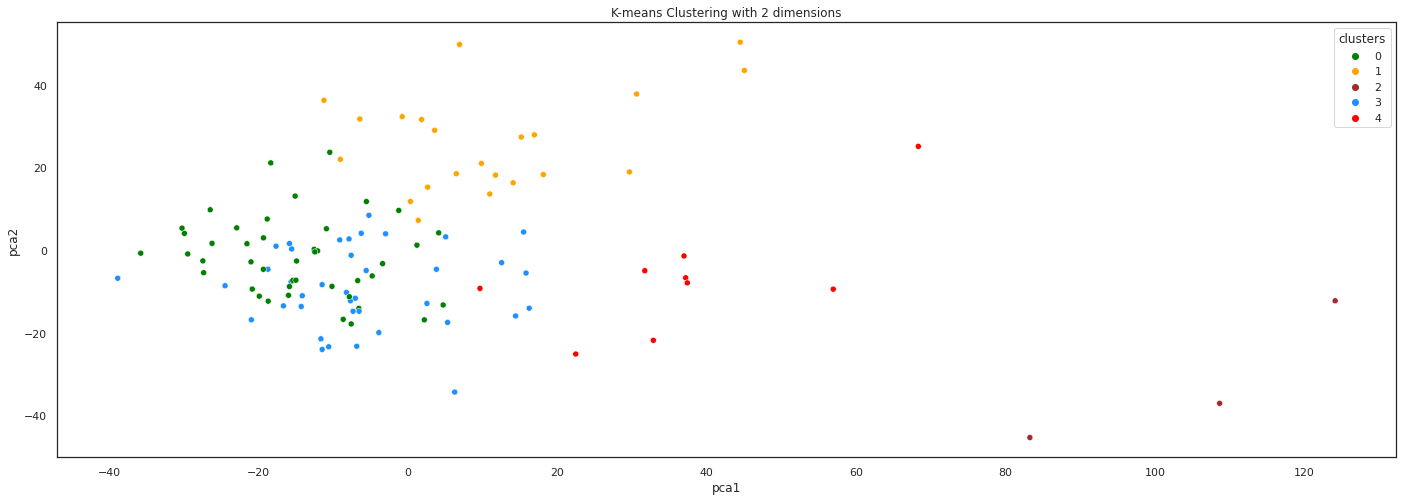

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.figure(figsize=(24, 8))


### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
t = np.arange(100)
g= sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results,palette=['green','orange','brown','dodgerblue','red'], legend='full')
g.set(xscale="linear")
plt.title('K-means Clustering with 2 dimensions')
plt.show()
#symlog

In [ ]:
!pip install factor_analyzer

# Importando bibliotecas (libraries) necessárias
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

!wget -O bfi.csv http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv

# A leitura do arquivo de dados para dentro de um dataframe (do pandas)
df = pd.read_csv('bfi.csv')

# Renomear a primeira coluna (que está sem nome) para 'id'
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True) 
print('A tabela importada contém %d linhas, %d colunas' % df.shape)
print('contendo as seguintes colunas:\n', df.columns)

# Para visualizar a tabela importada:
df.head()
# Tabela dfDemografico armazena id, sexo, educação e idade
dfDemografico = df[['id', 'gender', 'education', 'age']]

# Colunas desnecessárias são eliminadas de df
df.drop(['id', 'gender', 'education', 'age'],axis=1,inplace=True)

# Possíveis dados ausentes são eliminados
df.dropna(inplace=True)

# Para verificar as colunas de df
df.head(2)

--2021-07-19 04:29:01--  http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv
Resolving www-eio.upc.edu (www-eio.upc.edu)... 147.83.24.219
Connecting to www-eio.upc.edu (www-eio.upc.edu)|147.83.24.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182884 (179K) [text/csv]
Saving to: ‘bfi.csv’

bfi.csv             100%[===================>] 178.60K   159KB/s    in 1.1s    

2021-07-19 04:29:03 (159 KB/s) - ‘bfi.csv’ saved [182884/182884]

A tabela importada contém 2800 linhas, 29 colunas
contendo as seguintes colunas:
 Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3',
       'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')


A1   A2   A3   A4   A5   C1   C2  ...   N4   N5   O1  O2   O3   O4   O5
0  2.0  4.0  3.0  4.0  4.0  2.0  3.0  ...  2.0  3.0  3.0   6  3.0  4.0  3.0
1  2.0  4.0  5.0  2.0  5.0  5.0  4.0  ...  5.0  5.0  4.0   2  4.0  3.0  3.0

[2 rows x 25 columns]

In [ ]:
### Get the features data
data = df

In [ ]:
clustering_kmeans = KMeans(n_clusters=6, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

In [ ]:
clustering_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
data

A1   A2   A3   A4   A5   C1   C2  ...   N5   O1  O2   O3   O4   O5  clusters
0     2.0  4.0  3.0  4.0  4.0  2.0  3.0  ...  3.0  3.0   6  3.0  4.0  3.0         4
1     2.0  4.0  5.0  2.0  5.0  5.0  4.0  ...  5.0  4.0   2  4.0  3.0  3.0         4
2     5.0  4.0  5.0  4.0  4.0  4.0  5.0  ...  3.0  4.0   2  5.0  5.0  2.0         2
3     4.0  4.0  6.0  5.0  5.0  4.0  4.0  ...  1.0  3.0   3  4.0  3.0  5.0         4
4     2.0  3.0  3.0  4.0  5.0  4.0  4.0  ...  3.0  3.0   3  4.0  3.0  3.0         4
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ...  ...  ...       ...
2793  3.0  4.0  3.0  1.0  3.0  5.0  4.0  ...  6.0  6.0   1  4.0  5.0  2.0         1
2794  5.0  5.0  5.0  5.0  3.0  5.0  4.0  ...  2.0  6.0   1  5.0  6.0  2.0         2
2797  2.0  3.0  5.0  2.0  5.0  5.0  5.0  ...  1.0  5.0   1  6.0  4.0  3.0         0
2798  5.0  2.0  2.0  4.0  4.0  5.0  5.0  ...  1.0  5.0   2  5.0  5.0  1.0         2
2799  2.0  3.0  1.0  4.0  2.0  5.0  5.0  ...  1.0  3.0   1  3.0  5.0  1.0         3

[2436 rows x 26 columns]

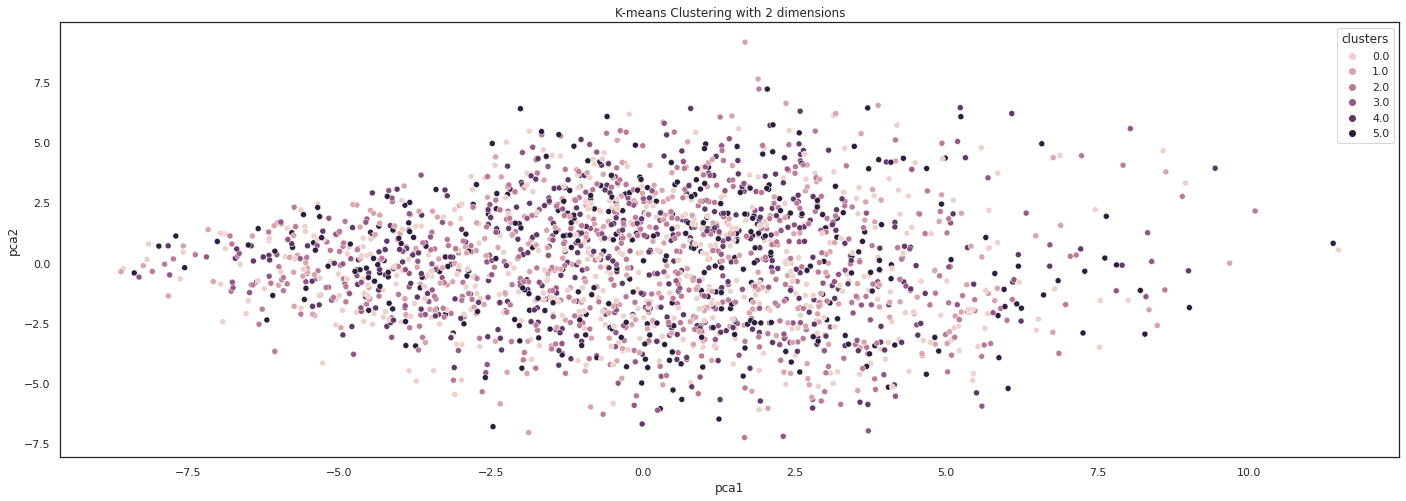

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.figure(figsize=(24, 8))


### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()
#symlog
# palette=['green','orange','brown','dodgerblue','red','black']

In [ ]:
data_trans1['clusters']

A1    3
A2    2
A3    2
A4    2
A5    2
C1    0
C2    0
C3    0
C4    3
C5    3
E1    4
E2    4
E3    2
E4    2
E5    2
N1    1
N2    1
N3    1
N4    1
N5    1
O1    2
O2    3
O3    2
O4    2
O5    3
Name: clusters, dtype: int32

In [ ]:
reduced_data

array([[ 2.56378657,  2.80610917],
       [ 0.64158896, -0.3202678 ],
       [ 1.23583198, -1.18341204],
       ...,
       [-2.76541078, -0.97266903],
       [ 2.10051085, -1.98004597],
       [ 1.27792575,  6.05166523]])

## **PRUEBA**

In [ ]:
!pip install factor_analyzer

# Importando bibliotecas (libraries) necessárias
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

!wget -O bfi.csv http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv

# A leitura do arquivo de dados para dentro de um dataframe (do pandas)
df = pd.read_csv('bfi.csv')

# Renomear a primeira coluna (que está sem nome) para 'id'
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True) 
print('A tabela importada contém %d linhas, %d colunas' % df.shape)
print('contendo as seguintes colunas:\n', df.columns)

# Para visualizar a tabela importada:
df.head()
# Tabela dfDemografico armazena id, sexo, educação e idade
dfDemografico = df[['id', 'gender', 'education', 'age']]

# Colunas desnecessárias são eliminadas de df
df.drop(['id', 'gender', 'education', 'age'],axis=1,inplace=True)

# Possíveis dados ausentes são eliminados
df.dropna(inplace=True)

# Para verificar as colunas de df
df.head(2)

--2021-07-19 04:29:07--  http://www-eio.upc.edu/~pau/cms/rdata/csv/psych/bfi.csv
Resolving www-eio.upc.edu (www-eio.upc.edu)... 147.83.24.219
Connecting to www-eio.upc.edu (www-eio.upc.edu)|147.83.24.219|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182884 (179K) [text/csv]
Saving to: ‘bfi.csv’

bfi.csv             100%[===================>] 178.60K   160KB/s    in 1.1s    

2021-07-19 04:29:09 (160 KB/s) - ‘bfi.csv’ saved [182884/182884]

A tabela importada contém 2800 linhas, 29 colunas
contendo as seguintes colunas:
 Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3',
       'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')


A1   A2   A3   A4   A5   C1   C2  ...   N4   N5   O1  O2   O3   O4   O5
0  2.0  4.0  3.0  4.0  4.0  2.0  3.0  ...  2.0  3.0  3.0   6  3.0  4.0  3.0
1  2.0  4.0  5.0  2.0  5.0  5.0  4.0  ...  5.0  5.0  4.0   2  4.0  3.0  3.0

[2 rows x 25 columns]

In [ ]:
trans = df.T
trans.head()

0     1     2     3     4     5     ...  2792  2793  2794  2797  2798  2799
A1   2.0   2.0   5.0   4.0   2.0   6.0  ...   5.0   3.0   5.0   2.0   5.0   2.0
A2   4.0   4.0   4.0   4.0   3.0   6.0  ...   5.0   4.0   5.0   3.0   2.0   3.0
A3   3.0   5.0   5.0   6.0   3.0   5.0  ...   5.0   3.0   5.0   5.0   2.0   1.0
A4   4.0   2.0   4.0   5.0   4.0   6.0  ...   6.0   1.0   5.0   2.0   4.0   4.0
A5   4.0   5.0   4.0   5.0   5.0   5.0  ...   5.0   3.0   3.0   5.0   4.0   2.0

[5 rows x 2436 columns]

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
normal_trans = scaler.fit_transform(trans)
normal_trans1=pd.DataFrame(normal_trans)
normal_trans1.head()

0     1         2     3         4     ...  2431  2432  2433  2434  2435
0  0.00   0.2  1.000000   0.6  0.000000  ...   0.4   0.8   0.2   0.8  0.25
1  0.50   0.6  0.666667   0.6  0.333333  ...   0.6   0.8   0.4   0.2  0.50
2  0.25   0.8  1.000000   1.0  0.333333  ...   0.4   0.8   0.8   0.2  0.00
3  0.50   0.2  0.666667   0.8  0.666667  ...   0.0   0.8   0.2   0.6  0.75
4  0.50   0.8  0.666667   0.8  1.000000  ...   0.4   0.4   0.8   0.6  0.25

[5 rows x 2436 columns]

In [ ]:
#normal_trans1=trans

In [ ]:
clustering_kmeans1 = KMeans(n_clusters=5, precompute_distances="auto", n_jobs=-1)
normal_trans1['clusters'] = clustering_kmeans1.fit_predict(normal_trans1)

In [ ]:
trans.head()

0     1     2     3     4     5     ...  2792  2793  2794  2797  2798  2799
A1   2.0   2.0   5.0   4.0   2.0   6.0  ...   5.0   3.0   5.0   2.0   5.0   2.0
A2   4.0   4.0   4.0   4.0   3.0   6.0  ...   5.0   4.0   5.0   3.0   2.0   3.0
A3   3.0   5.0   5.0   6.0   3.0   5.0  ...   5.0   3.0   5.0   5.0   2.0   1.0
A4   4.0   2.0   4.0   5.0   4.0   6.0  ...   6.0   1.0   5.0   2.0   4.0   4.0
A5   4.0   5.0   4.0   5.0   5.0   5.0  ...   5.0   3.0   3.0   5.0   4.0   2.0

[5 rows x 2436 columns]

In [ ]:
normal_trans1.clusters.sort_values()

0     0
21    0
8     0
24    0
14    1
5     1
6     1
7     1
22    1
20    1
23    1
19    2
18    2
17    2
15    2
16    2
1     3
4     3
13    3
2     3
3     3
12    3
11    4
10    4
9     4
Name: clusters, dtype: int32

In [ ]:
itens=df.columns
print(itens)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')


In [ ]:
# Substitue as linhas pelo nomes dos itens
normal_trans1.index=itens

In [ ]:
normal_trans1.clusters.sort_values()

A1    0
O2    0
C4    0
O5    0
E5    1
C1    1
C2    1
C3    1
O3    1
O1    1
O4    1
N5    2
N4    2
N3    2
N1    2
N2    2
A2    3
A5    3
E4    3
A3    3
A4    3
E3    3
E2    4
E1    4
C5    4
Name: clusters, dtype: int32

In [ ]:
normal_trans1.reset_index(inplace=True, drop=True)

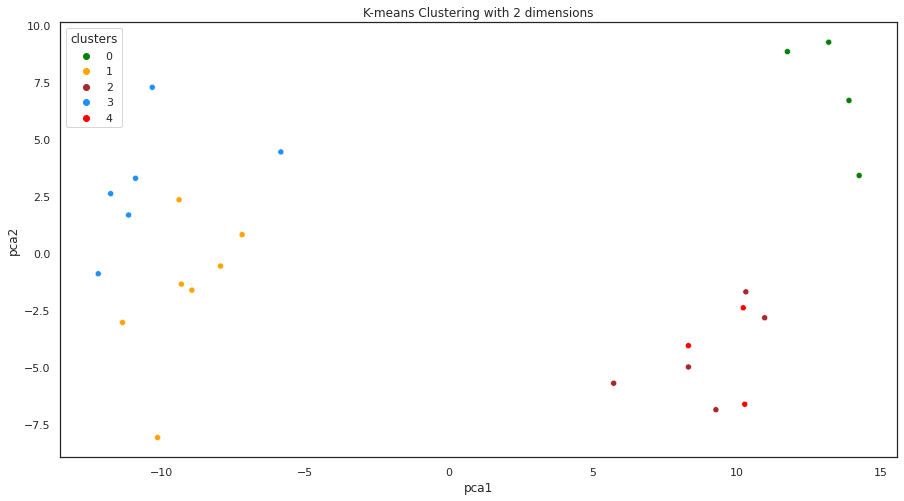

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

plt.figure(figsize=(15,8))


### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data1 = PCA(n_components=2).fit_transform(normal_trans1)
results = pd.DataFrame(reduced_data1,columns=['pca1','pca2'])

g= sns.scatterplot(x="pca1", y="pca2", hue=normal_trans1['clusters'], data=results,  legend='full',
                   palette=['green','orange','brown','dodgerblue','red'])
g.set(xscale="linear")
plt.title('K-means Clustering with 2 dimensions')
plt.show()
#symlog
# palette=['green','orange','brown','dodgerblue','red','black'], legend='full'

In [ ]:
export1_rf=pd.concat((pd.DataFrame(reduced_data1),normal_trans1.clusters.rename('cluster')), axis=1)

export1_rf.index=itens
export1_rf

#export1_rf.clusters.sort_values()


0         1  cluster
A1  13.890866  6.706474        0
A2 -12.194742 -0.898837        3
A3 -11.140881  1.679185        3
A4 -11.762506  2.615972        3
A5 -10.898420  3.291980        3
C1  -9.305865 -1.355469        1
C2  -7.945732 -0.559464        1
C3  -7.196814  0.817369        1
C4  14.243591  3.412881        0
C5   8.309661 -4.055699        4
E1  10.216332 -2.393142        4
E2  10.268921 -6.627407        4
E3  -5.849657  4.447322        3
E4 -10.318270  7.283841        3
E5  -9.387211  2.349462        1
N1  10.960214 -2.830908        2
N2   5.713483 -5.704761        2
N3   8.311504 -4.991160        2
N4   9.266332 -6.866312        2
N5  10.307320 -1.692257        2
O1 -11.351146 -3.038079        1
O2  11.750920  8.850061        0
O3  -8.941039 -1.618081        1
O4 -10.132104 -8.087790        1
O5  13.185242  9.264817        0

In [ ]:
nuevo = export1_rf.tail(5)
nuevo

0         1  cluster
O1 -11.351146 -3.038079        1
O2  11.750920  8.850061        0
O3  -8.941039 -1.618081        1
O4 -10.132104 -8.087790        1
O5  13.185242  9.264817        0

In [ ]:
nuevo[[0,1]]

0         1
O1 -11.351146 -3.038079
O2  11.750920  8.850061
O3  -8.941039 -1.618081
O4 -10.132104 -8.087790
O5  13.185242  9.264817

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


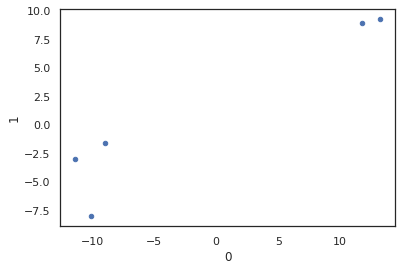

In [ ]:
nuevo1 = nuevo[[0,1]]
nuevo1.plot.scatter(x=0, y=1, alpha=1)

In [ ]:
nuevo2 = export1_rf.loc[(export1_rf["cluster"]==0)]
nuevo2

0         1  cluster
A1  13.890866  6.706474        0
C4  14.243591  3.412881        0
O2  11.750920  8.850061        0
O5  13.185242  9.264817        0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


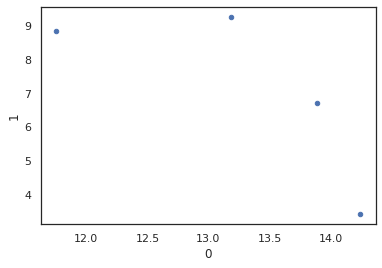

In [ ]:
nuevo3 = nuevo2[[0,1]]
nuevo3.plot.scatter(x=0, y=1, alpha=1)

In [ ]:
export1_rf5 = export1_rf[[0,1]]
export1_rf5

0         1
A1  13.890866  6.706474
A2 -12.194742 -0.898837
A3 -11.140881  1.679185
A4 -11.762506  2.615972
A5 -10.898420  3.291980
C1  -9.305865 -1.355469
C2  -7.945732 -0.559464
C3  -7.196814  0.817369
C4  14.243591  3.412881
C5   8.309661 -4.055699
E1  10.216332 -2.393142
E2  10.268921 -6.627407
E3  -5.849657  4.447322
E4 -10.318270  7.283841
E5  -9.387211  2.349462
N1  10.960214 -2.830908
N2   5.713483 -5.704761
N3   8.311504 -4.991160
N4   9.266332 -6.866312
N5  10.307320 -1.692257
O1 -11.351146 -3.038079
O2  11.750920  8.850061
O3  -8.941039 -1.618081
O4 -10.132104 -8.087790
O5  13.185242  9.264817

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    
    # Inicializar los valores
    (m, n) = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m, dtype=int)

    # Llevaremos un historial de los centroides por cada cluster y cada iteración
    centroids_history = np.zeros((K, max_iters + 1, n))
    centroids_history[:,0] = initial_centroids

    # Ejecutar k-means
    for i in range(max_iters):
    
        # Estatus de avance
        print('Iteración de k-means %d/%d...' % ((i+1), max_iters))
        
        # Asignar cada de ejemplo en X a su centroide más cercano
        idx = findClosestCentroids(X, centroids)
        
        # Opcionalmente, mostrar diagrama con avance
        if plot_progress:
            centroids_history[:,i] = centroids
            plotProgresskMeans(X, centroids, centroids_history, idx, K, i)
            input('Presiona Intro para continuar.')

        # Calcular los nuevos centroides luego de las asignaciones a clusters
        centroids = computeCentroids(X, idx, K)
        
    return (centroids, idx)

In [ ]:
def plotProgresskMeans(X, centroids, centroids_history, idx, K, i):
    
    plt.title('Iteración #%d' % (i+1) )
    
    # Dibujar los ejemplos del conjunto de datos
    plt.scatter(X[:,0], X[:,1], c=idx, cmap='prism')
    
    # Dibujar el avance desde los centroides iniciales
    for j in range(K):
        plt.plot(centroids_history[j, 0:(i+1), 0], centroids_history[j, 0:(i+1), 1], '-', c='gray')
        plt.scatter(centroids_history[j, 0:i, 0], centroids_history[j, 0:i, 1], marker='d', c='gray')
    
    # Dibujar los centroides
    plt.scatter(centroids[:,0], centroids[:,1], c='k', marker='x')

    plt.show()

    return

In [ ]:
from numpy.random import permutation

def kMeansInitCentroids(X, K):
    
    # Calcular el número de ejemplos
    m = X.shape[0]
    
    # Reordernar aleatoriamente los índices de los ejemplos
    randidx = permutation(m)
    
    # Tomar los primeros K ejemplos como centroides
    centroids = X[randidx[0:K]]
    
    return centroids

In [ ]:
import numpy as np
from scipy.io import loadmat

def findClosestCentroids(X, centroids):

    # Calculamos el número de centroides K
    K = centroids.shape[0]

    # Calculamos el número de ejemplos m
    m = X.shape[0]

    # Tienes que devolver el valor correcto de idx. Lo inicializamos en cero.
    idx = np.zeros(m, dtype=int)

    # ====================== COMPLETA TU CÓDIGO ABAJO ======================
    # Instrucciones: Recorre cada ejemplo, encuentra su centroide más cercano,
    # y almacena el índice en la ubicación correcta de idx. Específicamente,
    # idx es un vector de dimensiones m x 1, donde idx(i) debe contener el índice
    # del centroide más cercano al ejemplo i. Por lo tanto, debe contener valores
    # en el rango 0...(K-1)
    #
    # Nota: Puedes usar bucles 'for' 

    for i in range(m):
      dist = np.linalg.norm(X[i] - centroids, axis=1)
      min_distancia = np.argmin(dist)
      idx[i] = min_distancia




    # =============================================================

    return idx

#Link de ayuda https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy


In [ ]:
def computeCentroids(X, idx, K):

    # Calculamos el número de ejemplos m y el número de características n
    (m, n) = X.shape

    # Tienes que devolver el valor correcto de cada centroide. Los inicializamos en cero.
    centroids = np.zeros((K, n))

    # ====================== COMPLETA TU CÓDIGO ABAJO ======================
    # Instrucciones: Recorre cada centroide y calcula la media de todos los puntos
    # que le han sido asignados. Especificamente, el vector fila centroids[i]
    # debe contener la media de los puntos de datos asignados al centroide i.
    #
    # Nota 1: Puedes usar bucles 'for' 
    # Nota 2: X[idx == 2] es el subconjunto de puntos de datos asignados al centroide 2.
    # Nota 3: Se puede calcular la media con la función numpy.mean(). No olvidar asignar
    #         el parámetro axis=0 para calcular la media de las filas.
    # 
    for k in range(K):
      centroids[k, :] = np.mean(X[idx.ravel() == k, :], axis=0)
        
    # =============================================================

    return centroids

Ejecutando clustering de k-means en el conjunto de datos... 

Iteración de k-means 1/10...


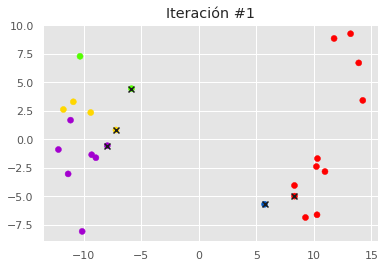

Presiona Intro para continuar.
Iteración de k-means 2/10...


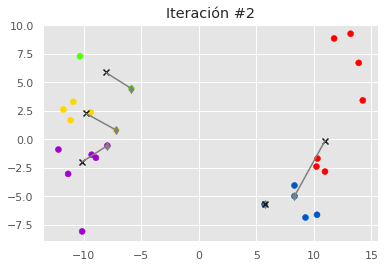

Presiona Intro para continuar.
Iteración de k-means 3/10...


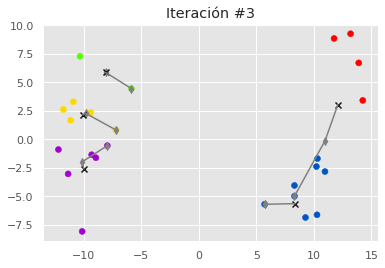

Presiona Intro para continuar.
Iteración de k-means 4/10...


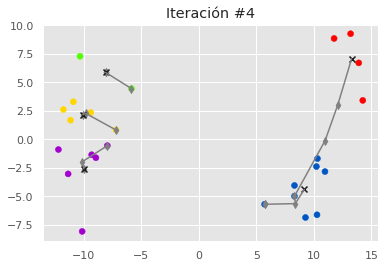

Presiona Intro para continuar.
Iteración de k-means 5/10...


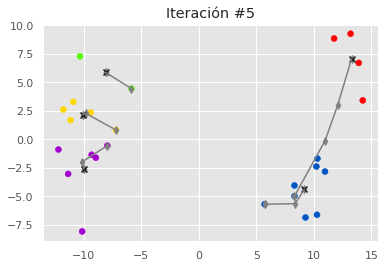

Presiona Intro para continuar.
Iteración de k-means 6/10...


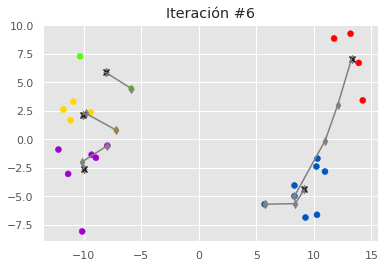

Presiona Intro para continuar.
Iteración de k-means 7/10...


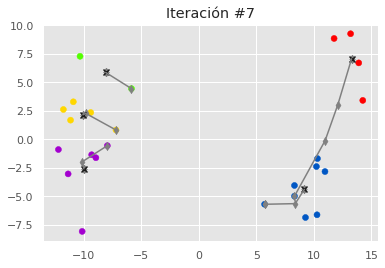

Presiona Intro para continuar.
Iteración de k-means 8/10...


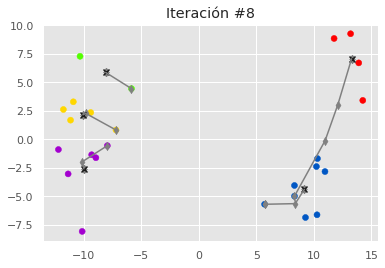

Presiona Intro para continuar.
Iteración de k-means 9/10...


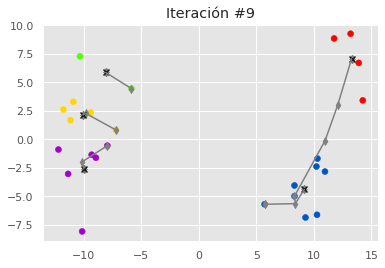

Presiona Intro para continuar.
Iteración de k-means 10/10...


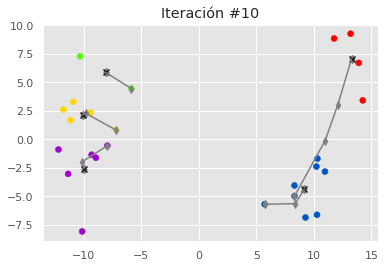

Presiona Intro para continuar.

Fin de ejecución de k-means.


In [ ]:
print('Ejecutando clustering de k-means en el conjunto de datos... \n');

# Cargar el conjunto de datos
#exdata2 = loadmat('ex7data2.mat')
X = np.array(export1_rf5)

# Parámetros de k-means
K = 5
max_iters = 10

# Por consistencia, configuramos acá unos valores específico pero en la práctica
# habrá que generarlos automáticamente de manera aleatoria, como se verá más
# adelante en kMeansInitCentroids
initial_centroids =  kMeansInitCentroids(X,K)

# Ejecutar el algoritmo k-means
(centroids, idx) = runkMeans(X, initial_centroids, max_iters, plot_progress=True)
print('\nFin de ejecución de k-means.')

## **REDUCIENDO IMAGENES**

In [ ]:
print('Ejecutando clustering de k-means en los pixels de una imagen... \n');
import imageio
A = imageio.imread('https://drive.google.com/uc?id=1mjtqzugagrPt4vkAQGYu2abxWLGlLoON&export=download')

# https://drive.google.com/file/d/1FeJ41kt6za2CLhw84Cls_-IQ6doRCVzi/view?usp=sharing
# https://drive.google.com/file/d/1mjtqzugagrPt4vkAQGYu2abxWLGlLoON/view?usp=sharing

Ejecutando clustering de k-means en los pixels de una imagen... 



In [ ]:
print('Ejecutando clustering de k-means en los pixels de una imagen... \n');
import imageio
A = imageio.imread('https://drive.google.com/uc?id=1FeJ41kt6za2CLhw84Cls_-IQ6doRCVzi&export=download')


Ejecutando clustering de k-means en los pixels de una imagen... 



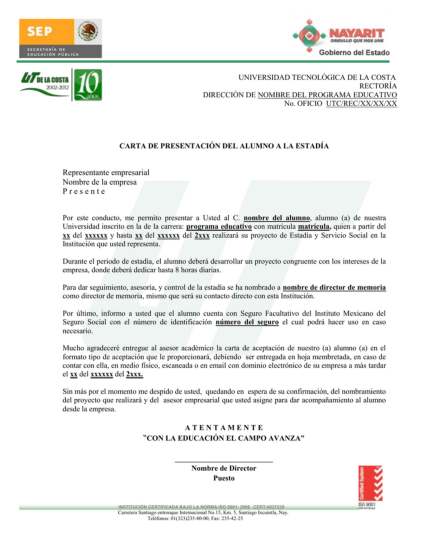

In [ ]:
plt.figure(figsize=(18,10))
plt.axis('off')
plt.imshow(A);

In [ ]:
plt.imsave('test8.png', A)

In [ ]:
!ls -ltr

total 7112
-rw-r--r-- 1 root root  182884 Jul  8  2014 bfi.csv
drwxr-xr-x 1 root root    4096 Jul 15 13:38 sample_data
-rw-r--r-- 1 root root 2622431 Jul 19 05:27 test.png
-rw-r--r-- 1 root root 2622431 Jul 19 05:27 test1.png
-rw-r--r-- 1 root root  366030 Jul 19 05:28 test2.png
-rw-r--r-- 1 root root       0 Jul 19 06:05 tienda_comprimida.jpg
-rw-r--r-- 1 root root       0 Jul 19 06:06 test5.png
-rw-r--r-- 1 root root  383385 Jul 19 06:08 test6.png
-rw-r--r-- 1 root root       0 Jul 19 06:08 tienda_comprimida1.jpg
-rw-r--r-- 1 root root  217858 Jul 19 06:09 audacious.jpg
-rw-r--r-- 1 root root  373205 Jul 19 06:19 test4.png
-rw-r--r-- 1 root root  111004 Jul 19 06:20 audacious1.jpg
-rw-r--r-- 1 root root  373205 Jul 19 06:21 test8.png


In [ ]:
from PIL import Image
I = Image.open("test8.png")

In [ ]:
w, h = I.size
colors = I.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print(u'Número de pixels  = ', num_pixels)
print(u'Número de colores = ', num_colores)

Número de pixels  =  809984
Número de colores =  256


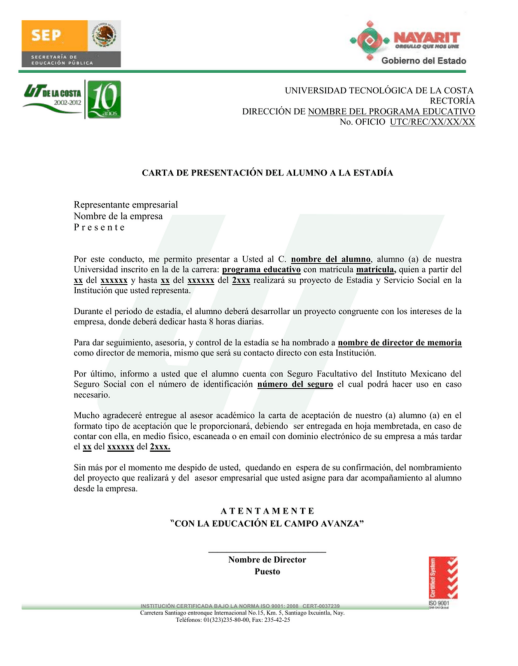

In [ ]:
a = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(a)
plt.axis('off')
plt.show()

In [ ]:
x, y, z = a.shape
print('Dimensiones matriz a ', a.shape)

a1 = a.reshape(x*y, z)
print('Dimensiones matriz a1 ', a1.shape)

Dimensiones matriz a  (1024, 791, 4)
Dimensiones matriz a1  (809984, 4)


In [ ]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(a1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

print('dimensiones centroides ', centroides.shape)
print('dimensiones etiquetas ', etiquetas.shape)

dimensiones centroides  (2, 4)
dimensiones etiquetas  (809984,)


In [ ]:
a2 = centroides[etiquetas]
print('Dimensiones matriz a2 ', a2.shape)

a3 = a2.reshape(x,y,z)
print('Dimensiones matriz a3 ', a3.shape)

Dimensiones matriz a2  (809984, 4)
Dimensiones matriz a3  (1024, 791, 4)


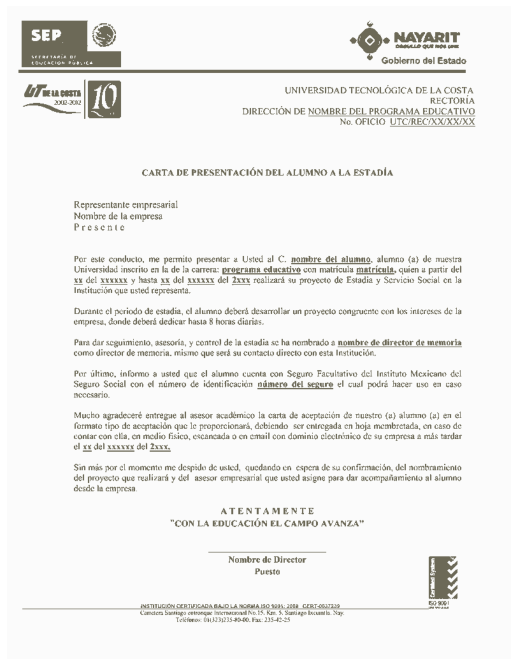

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(a3)
plt.axis('off')
plt.show()

In [ ]:
plt.imsave('test6.png', a3)

In [ ]:

a4 = np.floor(a3*255)
a5 = a4.astype(np.uint8)

I1 = Image.fromarray(a5)

rgb_im = I1.convert('RGB')
rgb_im.save('test10.jpg')



In [ ]:
w, h = I1.size
colors = I1.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print(u'Número de pixels  = ', num_pixels)
print(u'Número de colores = ', num_colores)

Número de pixels  =  809984
Número de colores =  2


In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html

print("A ndim: ", A.ndim)
print("A shape:", A.shape)
print("A size: ", A.size)

print("dtype:", A.dtype)

print("itemsize:", A.itemsize, "bytes")
print("nbytes:", A.nbytes, "bytes")



A ndim:  3
A shape: (1441, 1920, 3)
A size:  8300160
dtype: uint8
itemsize: 1 bytes
nbytes: 8300160 bytes


In [ ]:
A = np.asarray(A, dtype=float)


In [ ]:
A[:2, :3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
A = A / 255
A[:2, :3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
img_size = A.shape
img_size

(1441, 1920, 3)

In [ ]:
X = A.reshape((img_size[0] * img_size[1], 3))
X[:2, :3]

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
X.shape

(2766720, 3)

In [ ]:
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
(centroids, idx) = runkMeans(X, initial_centroids, max_iters)

Iteración de k-means 1/10...


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Iteración de k-means 2/10...
Iteración de k-means 3/10...
Iteración de k-means 4/10...
Iteración de k-means 5/10...
Iteración de k-means 6/10...
Iteración de k-means 7/10...
Iteración de k-means 8/10...
Iteración de k-means 9/10...
Iteración de k-means 10/10...


In [ ]:
print('Aplicando k-means para comprimir una imagen... \n');

# Encontrar los centroides más cercanos a cada pixel
idx = findClosestCentroids(X, centroids)



Aplicando k-means para comprimir una imagen... 



In [ ]:

print("idx ndim: ", idx.ndim)
print("idx shape:", idx.shape)
print("idx size: ", idx.size)

print("dtype:", idx.dtype)

print("itemsize:", idx.itemsize, "bytes")
print("nbytes:", idx.nbytes, "bytes")



idx ndim:  1
idx shape: (2766720,)
idx size:  2766720
dtype: int64
itemsize: 8 bytes
nbytes: 22133760 bytes


In [ ]:
# Esencialmente, hemos representado la imagen X en función 
# de los índices en idx

# Ahora podemos recuperar la imagen a partir de los índices (idx)
# mapeando cada pixel (identificado con su índice en idx) al valor
# de su centroide
X_recovered = centroids[idx]



In [ ]:


print("X_recovered ndim: ", X_recovered.ndim)
print("X_recovered shape:", X_recovered.shape)
print("X_recovered size: ", X_recovered.size)

print("dtype:", X_recovered.dtype)

print("itemsize:", X_recovered.itemsize, "bytes")
print("nbytes:", X_recovered.nbytes, "bytes")



X_recovered ndim:  2
X_recovered shape: (2766720, 3)
X_recovered size:  8300160
dtype: float64
itemsize: 8 bytes
nbytes: 66401280 bytes


In [ ]:
# Transformar la imagen recuperada en sus dimensiones originales
X_recovered = X_recovered.reshape((img_size[0], img_size[1], 3))



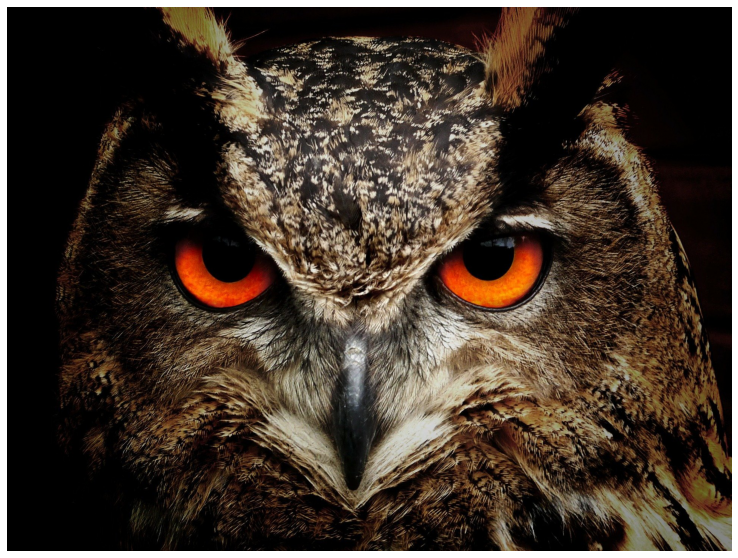

In [ ]:

plt.figure(figsize=(18,10))
plt.axis('off')
plt.imshow(A);

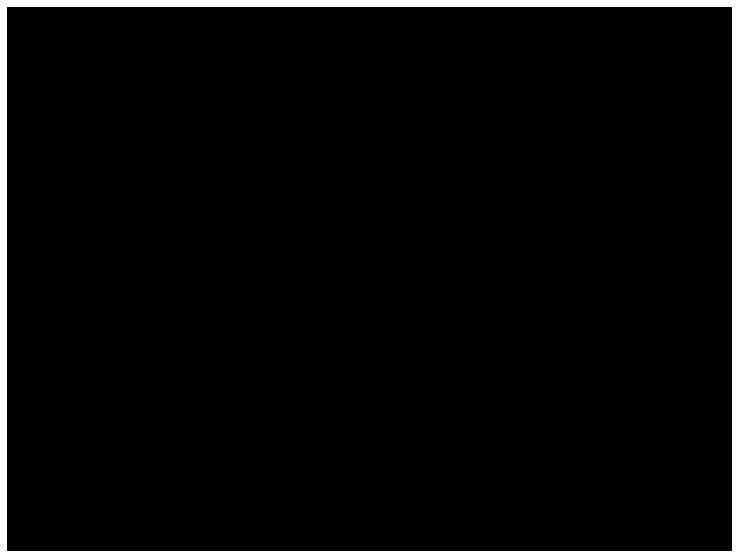

In [ ]:
plt.figure(figsize=(18,10))
plt.axis('off')
plt.imshow(X_recovered);

In [ ]:
plt.imsave('test1.png', A, cmap=cmap)

In [ ]:
!ls -ltr

total 5672
-rw-r--r-- 1 root root  182884 Jul  8  2014 bfi.csv
drwxr-xr-x 1 root root    4096 Jul 15 13:38 sample_data
-rw-r--r-- 1 root root 2622431 Jul 19 05:27 test.png
-rw-r--r-- 1 root root 2622431 Jul 19 05:27 test1.png
-rw-r--r-- 1 root root  366030 Jul 19 05:28 test2.png


In [ ]:
plt.imsave('test2.png', X_recovered)

Text(0.5, 1.0, 'Comprimida, con 16 colores')

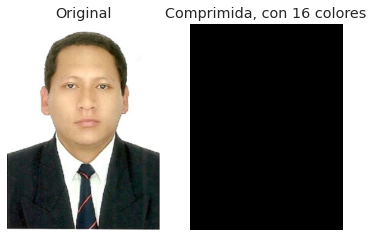

<Figure size 1296x720 with 0 Axes>

In [ ]:
# Mostrar la imagen original y la recuperada


f, (ax1, ax2) = plt.subplots(1, 2)
plt.figure(figsize=(18,10))
ax1.axis('off')
ax1.imshow(A) 
ax1.set_title('Original')
ax2.axis('off')
ax2.imshow(X_recovered)
ax2.set_title('Comprimida, con {} colores'.format(K))


Número de pixels  =  2073600
Número de colores =  326086


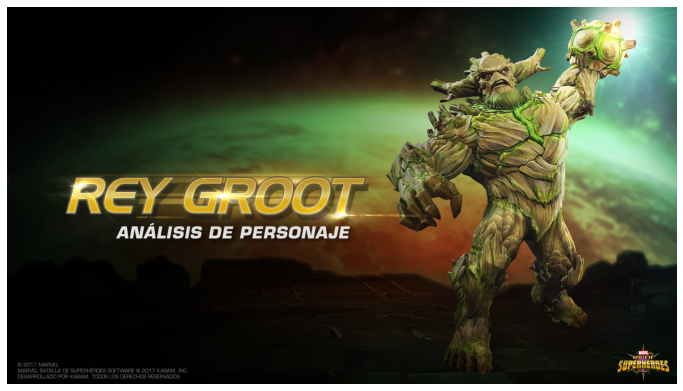

Dimensiones matriz a  (1080, 1920, 4)
Dimensiones matriz a1  (2073600, 4)


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

I = Image.open("grrot1.png")

w, h = I.size
colors = I.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print(u'Número de pixels  = ', num_pixels)
print(u'Número de colores = ', num_colores)


a = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(a)
plt.axis('off')
plt.show()

x, y, z = a.shape
print('Dimensiones matriz a ', a.shape)

a1 = a.reshape(x*y, z)
print('Dimensiones matriz a1 ', a1.shape)

n = 5
k_means = KMeans(n_clusters=n)

In [ ]:
k_means.fit(a1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

dimensiones centroides  (5, 4)
dimensiones etiquetas  (2073600,)
Dimensiones matriz a2  (2073600, 4)
Dimensiones matriz a3  (1080, 1920, 4)


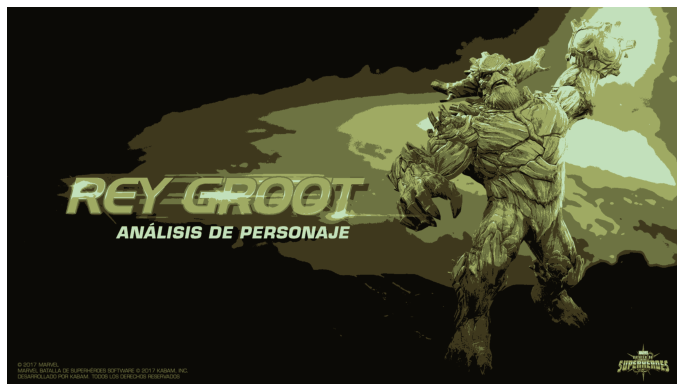

In [ ]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

print('dimensiones centroides ', centroides.shape)
print('dimensiones etiquetas ', etiquetas.shape)

a2 = centroides[etiquetas]
print('Dimensiones matriz a2 ', a2.shape)

a3 = a2.reshape(x,y,z)
print('Dimensiones matriz a3 ', a3.shape)


plt.figure(figsize=(12,12))
plt.imshow(a3)
plt.axis('off')
plt.show()


In [ ]:
a4.shape

print("A ndim: ", a4.ndim)
print("A shape:", a4.shape)
print("A size: ", a4.size)

print("dtype:", a4.dtype)

print("itemsize:", a4.itemsize, "bytes")
print("nbytes:", a4.nbytes, "bytes")


A ndim:  3
A shape: (1080, 1920, 4)
A size:  8294400
dtype: float32
itemsize: 4 bytes
nbytes: 33177600 bytes


In [ ]:
a4 = np.floor(a3*255)
a5 = a4.astype(np.uint8)

I1 = Image.fromarray(a5)

rgb_im = I1.convert('RGB')
rgb_im.save('rolan_test.jpg')


w, h = I1.size
colors = I1.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print(u'Número de pixels  = ', num_pixels)
print(u'Número de colores = ', num_colores)

Número de pixels  =  2073600
Número de colores =  5


In [ ]:
'''try:
    # for Python2
    from Tkinter import Tk, Label, Button, Entry, IntVar, END, W, E   ## notice capitalized T in Tkinter
    from Tkinter.filedialog import askopenfilename
    from Tkinter import tkMessageBox
except ImportError:
    # for Python3
    from tkinter import Tk, Label, Button, Entry, IntVar, END, W, E   ## notice lowercase 't' in tkinter here
    from tkinter.filedialog import askopenfilename
   from tkinter import tkMessageBox'''


from tkinter import Tk, Label, Button, Entry, IntVar, END, W, E   ## notice lowercase 't' in tkinter here
from tkinter.filedialog import askopenfilename
from tkinter import filedialog

from Tkinter import *
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy.stats import mode
import matplotlib.pyplot as plt
from PreProcess import *
from KMean import *
#from pre import model
import os

class GUI:

    df=pd.DataFrame({})

    def __init__(self, master):
        self.master = master
        master.title("K-Means Clustering")

        #Data path
        self.pathLabel = Label(master, text="Data path:")
        vcmd = master.register(self.validate) # we have to wrap the command
        self.pathEntry = Entry(master, validate="key") ##path for data
        self.browse_button = Button(master, text="Browse", command=lambda: self.browse())

        #Num of clusters k
        self.numOfClusLabel = Label(master, text="Num of clusters k:")
        vcmd = master.register(self.validate)  # we have to wrap the command
        self.numOfClusEntry = Entry(master, validate="key")

        #Num of runs
        self.numOfRunsLabel = Label(master, text="Num of runs:")
        vcmd = master.register(self.validate)  # we have to wrap the command
        self.numOfRunsEntry = Entry(master, validate="key")

        #pre process
        self.prePro_button = Button(master, text="Pre-Process", command=lambda: self.preProc())

        #cluster
        self.cluster_button = Button(master, text="Cluster", command=lambda: self.kMeans())

        # LAYOUT
        self.pathLabel.grid(row=1, column=0)
        self.pathEntry.grid(row=1, column=1, sticky=W+E)
        self.browse_button.grid(row=1,column=2)

        self.numOfClusLabel.grid(row=2, column=0)
        self.numOfClusEntry.grid(row=2, column=1)

        self.numOfRunsLabel.grid(row=3, column=0)
        self.numOfRunsEntry.grid(row=3, column=1)

        self.prePro_button.grid(row=4, column=1)

        self.cluster_button.grid(row=5, column=1)

    def validate(self, new_text):
        '''if not new_text:  # the field is being cleared
            self.entered_number = 0
            return True

        try:
            self.entered_number = int(new_text)
            return True
        except ValueError:
            return False'''

    def browse(self):
        #get data file and path for saving
        self.datapath = tkFileDialog.askopenfilename()
        self.pathEntry.insert(0,self.datapath)
        #check valid path and file
        if(not self.datapath):
            tkMessageBox.showinfo("K Means Clustering", "Please choose data file")
            return
        if (not (self.datapath[-5:] == ".xlsx" or self.datapath[-4:] == ".xls")):
            tkMessageBox.showinfo("K Means Clustering", "Please choose excel file")
            return
        self.df=pd.read_excel(self.datapath)
        if (self.df.empty or 'year' not in self.df.columns or 'country' not in self.df.columns or 'Generosity' not in self.df.columns or 'Social support' not in self.df.columns):
            tkMessageBox.showerror("K Means Clustering", "Invalid Excel File!")
            return
    #pre process
    def preProc(self):
        dataCleaner = PreProcess(self.df)
        self.df=dataCleaner.df
        #alert user
        tkMessageBox.showinfo("K Means Clustering", "Preprocessing completed successfully!")
        pass
    #clustering
    def kMeans(self):
        try:
            clusNum=int(self.numOfClusEntry.get())
            if(clusNum<=0):
                tkMessageBox.showerror("K Means Clustering", "Number of clusters must be positive")
                return

            runsNum=int(self.numOfRunsEntry.get())
            if (runsNum <= 0):
                tkMessageBox.showerror("K Means Clustering", "Number of runs must be positive")
                return
        except Exception:
            tkMessageBox.showerror("K Means Clustering", "invalid numbers")
            return

        cluster = KMean(self.df, clusNum,runsNum, self.datapath)
        self.df=cluster.df
        #set scatter plot
        path= os.path.dirname(os.path.abspath(self.datapath))+'\\scatterPlt.gif'
        scatterPlt=PhotoImage(file=path)
        self.scatterLbl=Label(image=scatterPlt)
        self.scatterLbl.image=scatterPlt
        self.scatterLbl.grid(row=6, column=2)
        #set map plot
        path=os.path.dirname(os.path.abspath(self.datapath))+'\\mapPLT.gif'
        mapPlt=PhotoImage(file=path)
        self.mapLbl=Label(image=mapPlt)
        self.mapLbl.image=mapPlt
        self.mapLbl.grid(row=6, column=1)
        #alert user
        tkMessageBox.showinfo("K Means Clustering", "Clustering completed successfully!")


root = Tk()
my_gui = GUI(root)

def on_closing():
    if tkMessageBox.askokcancel("Quit", "Are you sure?"):
        root.destroy()
        os._exit(0)

root.protocol("WM_DELETE_WINDOW", on_closing)
root.mainloop()


ModuleNotFoundError: ignored

In [ ]:
# GM GIT. 1.1.-Librerías
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
# 1.2.-Configuración general

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd

BabyDataSet = [('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

dataset = pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])


In [ ]:
dataset

Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973

In [ ]:
if a['Names'].str.contains('Mel').any():
    print ("Mel is there")

Mel is there


In [ ]:
conditionlist = [
    (dataset['Births'] >= 300) ]
choicelist = ['High']
dataset['Potencia_Range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
dataset

Names  Births Potencia_Range
0      Bob     968           High
1  Jessica     155  Not Specified
2     Mary      77  Not Specified
3     John     578           High
4      Mel     973           High

In [ ]:
conditionlist = [
    (dataset['Names'].str.contains('Mel'))]
choicelist = ['High']
dataset['Potencia_Range_2'] = np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
dataset

Names  Births Potencia_Range Potencia_Range_2
0      Bob     968           High    Not Specified
1  Jessica     155  Not Specified    Not Specified
2     Mary      77  Not Specified    Not Specified
3     John     578           High    Not Specified
4      Mel     973           High             High

In [ ]:
conditionlist = [
    (dataset['Names'].str.contains('Jo'))]
choicelist = ['High']
dataset['Potencia_Range_3'] = np.select(conditionlist, choicelist, default='Not Specified')

In [ ]:
dataset

Names  Births Potencia_Range Potencia_Range_2 Potencia_Range_3
0      Bob     968           High    Not Specified    Not Specified
1  Jessica     155  Not Specified    Not Specified    Not Specified
2     Mary      77  Not Specified    Not Specified    Not Specified
3     John     578           High    Not Specified             High
4      Mel     973           High             High    Not Specified

In [ ]:
# https://stackoverflow.com/questions/30944577/check-if-string-is-in-a-pandas-dataframe

In [ ]:
df_g.loc[
         (df_g['Solution'].str.match('Upgrade',na=False) | 
          df_g['Solution'].str.contains('update',na=False) | 
          df_g['Solution'].str.contains('Update',na=False) | 
          df_g['Solution'].str.contains('patch',na=False) | 
          df_g['Solution'].str.contains('Fix Pack',na=False) | 
          df_g['Solution'].str.contains('release',na=False)) & 
         df_g['Solution'].str.contains('Windows',na=False),['tipo_vuln']
         ]= 'Falta de parches del S.O. Windows'
